# **Aerofit case study**

  ## **Introduction**

  Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
  including machines such as treadmills, exercise bikes, gym equipment, and fitness
  accessories to cater to the needs of all categories of people.

  ## **Problem Statement**

  The market research team at AeroFit wants to identify the characteristics of the target
  audience for each type of treadmill offered by the company, to provide a better
  recommendation of the treadmills to the new customers. The team decides to investigate
  whether there are differences across the product with respect to customer characteristics.

  ## **Proposed solution**

  1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
  product by developing appropriate tables and charts.
  2. For each AeroFit treadmill product, construct two-way contingency tables and compute
  all conditional and marginal probabilities along with their insights/impact on the
  business.

  ## **Dataset**

  Dataset
  The company collected the data on individuals who purchased a treadmill from the AeroFit
  stores during the prior three months. The dataset has the following features:

  Dataset link [here](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)

  The link to the colab notebook can be found [here](https://colab.research.google.com/drive/1r_hPYouCy7YtmE4n3j_J5fp7EEufGw0y#scrollTo=-XRT6b3ZYMbc)

  ## **Preliminary information about the features of the Dataset:**

  - `Product` Purchased: KP281, KP481, or KP781
  - `Age`: In years
  - `Gender`: Male/Female
  - `Education`: In years
  - `MaritalStatus`: Single or partnered
  - `Usage`: The average number of times the customer plans to use the treadmill each week.
  - `Income`: Annual income (in $)
  - `Fitness`: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent
  - `Miles`: The average number of miles the customer expects to walk/run each week

  ## **Product Portfolio**
  - The KP281 is an entry-level treadmill that sells for \$1,500.
  - The KP481 is for mid-level runners that sell for \$1,750.
  - The KP781 treadmill is having advanced features that sell for \$2,500.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#downloading the dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 16.4MB/s]


In [ ]:
# reading the dataset file
aerofit_dataset = pd.read_csv('aerofit_treadmill.csv?1639992749')

In [ ]:
#displaying the dataset
aerofit_dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
aerofit_dataset.duplicated().value_counts()

False    180
dtype: int64

There is no duplicate entries present in the dataset.

In [ ]:
# checking the shape of the dataset
aerofit_dataset.shape

(180, 9)

**There are total 180 collection of data each having 9 attributes.**

In [ ]:
# getting the datatypes of each attributes
aerofit_dataset.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**The product , gender and matrial status are in string form and the other all datas are of integer datatype.**

In [ ]:
# converting categorical attributes to category data types
aerofit_dataset['Product'] = aerofit_dataset['Product'].astype('category')
aerofit_dataset['Gender'] = aerofit_dataset['Gender'].astype('category')
aerofit_dataset['MaritalStatus'] = aerofit_dataset['MaritalStatus'].astype('category')

In [ ]:
aerofit_dataset.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

# **Statistical Analysis :**

In [ ]:
#describing the dataset
aerofit_dataset.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Observations :
**Age :**


1.   The average age of users is nearly 28.8 years with a standard deviation of 6.94 years.
2.   The minimum age of user to buy any treadmill is 18 and maximum age is 50.

**Education :**

1. The customers who have bought the treadmill have completed approximately 15.57 years of education and with a standard deviation of 1.61 years.
2. Education levels range from a minimum 12 years to a maximum of 21 years, with most falling between 14 to 16 years.

**Fitness**
1. The average fitness level reported by users is around 3.31 with a standard deviation of 0.96.

**Income**
1. The a erage income of users is approximately \$53719 with a standard deviation of \$16506.
2. The income ranges from a minimum of \$29562 to a maximum of \$104581.

**Miles**
1. On average users have logged approximately 103.19 miles withh the product, with a standard deviation of 51.86 which indicates a wide spread of mileage.
2. Mileage ranges from a minimum of 21 miles to a maximum of 360 miles which is a huge range.





In [ ]:
# unique values in all the columns to analyse the ranges and discreteness
for col in aerofit_dataset.columns :
  print(f'Unique values in the {col} columns are : ')
  print(aerofit_dataset[col].unique())
  print("".center(70,'-'))

Unique values in the Product columns are : 
['KP281' 'KP481' 'KP781']
----------------------------------------------------------------------
Unique values in the Age columns are : 
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
----------------------------------------------------------------------
Unique values in the Gender columns are : 
['Male' 'Female']
----------------------------------------------------------------------
Unique values in the Education columns are : 
[14 15 12 13 16 18 20 21]
----------------------------------------------------------------------
Unique values in the MaritalStatus columns are : 
['Single' 'Partnered']
----------------------------------------------------------------------
Unique values in the Usage columns are : 
[3 2 4 5 6 7]
----------------------------------------------------------------------
Unique values in the Fitness columns are : 
[4 3 2 1 5]
-----------------------------------------------

## **Observations :**

**Product:**

-  Three treadmill models are available: KP281, KP481, and KP781.

**Age:**

-  Customers' ages range from 18 to 50 years, with most falling between 20 to 40 years.
-  There is a relatively even distribution across age groups.

**Gender:**

-  Both male and female customers are represented in the dataset.
- Gender distribution appears to be relatively balanced.

**Education:**

- Education levels range from 12 to 21 years, indicating a diverse customer base.
- Most customers have attained at least a secondary education level (12 years or more).

**Marital Status:**

- Customers are classified as either single or partnered.

**Usage:**

- Usage frequency ranges from 2 to 7 times per week.
- Most customers use the treadmill 3 to 5 times per week.

**Fitness:**

- Fitness ratings range from 1 to 5, with higher values indicating higher fitness levels.
- The majority of customers fall within the 3 to 4 range.

**Income:**

- Annual incomes vary widely, ranging from $29,562 to $104,581.
- The distribution of income appears to be skewed, with a larger concentration of customers earning below $80,000.

**Miles:**

- Weekly running mileage ranges from 21 to 360 miles.
- The majority of customers run between 50 to 200 miles per week, with some outliers exceeding 200 miles.


In [ ]:
# categorical columns analysis
categorical_columns = ["Product", "Gender", "MaritalStatus"]
for columns in categorical_columns:
    print(columns.center(60, "-"))
    print(aerofit_dataset[columns].value_counts())
    print()

--------------------------Product---------------------------
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

---------------------------Gender---------------------------
Male      104
Female     76
Name: Gender, dtype: int64

-----------------------MaritalStatus------------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64



##Stastistical observations :

 **Product :**
1.   KP281 is the most purchased treadmill among the three treadmill of aerofit , accounting for approximately 44% of total sales.
2.   This represent KP281 is the top performing product in terms of customer preference followed by KP481 and KP781.

**Gender :**
1. Based on the last three months purchase data around 58% buyers were male and 42% were female.

**Marital Status :**
1. The purchase data also shows that nearly 60% of the buyers were parterned while 40% were single.



In [ ]:
# object category datas
aerofit_dataset.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


# **Probabilistic analysis :**

## **Adding more columns for better analysis**

**Creating New Column and Categorizing values in Age,Education,Income and Miles to different
classes for better visualization as there many different values are there**

**Age Column**

    Categorizing the values in age column in 4 different buckets:

    Young Adult: from 18 - 25
    Adults: from 26 - 35
    Middle Aged Adults: 36-45
    Elder :46 and above

**Education Column**

    Categorizing the values in education column in 3 different buckets:

    Primary Education: upto 12
    Secondary Education: 13 to 15
    Higher Education: 16 and above

**Income Column**

    Categorizing the values in Income column in 4 different buckets:

    Low Income - Upto 40,000
    Moderate Income - 40,000 to 60,000
    High Income - 60,000 to 80,000
    Very High Income - Above 80,000

**Miles column**

    Categorizing the values in miles column in 4 different buckets:

    Light Activity - Upto 50 miles
    Moderate Activity - 51 to 100 miles
    Active Lifestyle - 101 to 200 miles
    Fitness Enthusiast - Above 200 miles


In [ ]:
# binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

aerofit_dataset['age_group'] = pd.cut(aerofit_dataset['Age'],bins = bin_range1,labels = bin_labels1)

# binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

aerofit_dataset['education_group'] = pd.cut(aerofit_dataset['Education'],bins = bin_range2,labels = bin_labels2)

# binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

aerofit_dataset['income_group'] = pd.cut(aerofit_dataset['Income'],bins = bin_range3,labels = bin_labels3)

# binning the miles values into categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

aerofit_dataset['miles_group'] = pd.cut(aerofit_dataset['Miles'],bins = bin_range4,labels = bin_labels4)
# aerofit_dataset = aerofit_dataset.drop(columns=['edu_group'])

#changing the categorical columns
categorical_columns = ['Gender','Fitness','age_group','education_group','income_group','miles_group']

In [ ]:
aerofit_dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,education_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


##**Probability of product purchased verses Age group**

### **Observations from marginal and joint probabilities :**

In [ ]:
pd.crosstab(index =aerofit_dataset['Product'],columns = aerofit_dataset['age_group'],margins = True,normalize = True )

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.188889,0.177778,0.061111,0.016667,0.444444
KP481,0.155556,0.133333,0.038889,0.005556,0.333333
KP781,0.094444,0.094444,0.022222,0.011111,0.222222
All,0.438889,0.405556,0.122222,0.033333,1.000000


**Observations :**


 1. The probabilit of purchasing the product by a young adult(18-25) is the most and it is 44%.


    The joint probability of purchasing the treadmill model and the customer is Young Adult is

        For Treadmill model KP281 - 19%

        For Treadmill model KP481 - 16%

        For Treadmill model KP781 - 9%

2. The probability of purchasing the porduct by an adult(26-35) is 41%


    The joint probability of purchasing the treadmill model and the customer is Adult is -

        For Treadmill model KP281 - 18%

        For Treadmill model KP481 - 13%

        For Treadmill model KP781 - 9%

3. The probability of purchasing the product by a middile aged(36-45) is only 12%.

4. The probability of purchasing the product by elder (above 45) is only 9%.

### **Observations from conditional probabilities :**

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(index=aerofit_dataset['Product'], columns=aerofit_dataset['age_group'], margins=True, normalize=True)

# Calculate conditional probabilities
conditional_probabilities = cross_tab.div(cross_tab['All'], axis=0)

# Drop the 'All' column as it's no longer needed
conditional_probabilities.drop(columns='All', inplace=True)

# Display the conditional probabilities
print(conditional_probabilities)

age_group  Young Adults    Adults  Middle Aged Adults     Elder
Product                                                        
KP281          0.425000  0.400000            0.137500  0.037500
KP481          0.466667  0.400000            0.116667  0.016667
KP781          0.425000  0.425000            0.100000  0.050000
All            0.438889  0.405556            0.122222  0.033333


**Observations :**
- The majority of treadmill purchasers belong to the "Young Adults" and "Adults" age groups, collectively representing over 80% probability across all models.

- Conversely, the "Middle-Aged Adults" and "Elder" demographics exhibit lower probabilities of purchasing treadmills, suggesting potential challenges in attracting these age groups.

- Despite variations in product features and pricing, the age distribution pattern remains consistent across all treadmill models.

- Marketing efforts should prioritize targeting young and middle-aged adults, while also exploring niche marketing strategies tailored to the needs of older demographics.







## **Probability of product purchased verses gender**

### **Observations from marginal and joint probabilities :**

In [ ]:
pd.crosstab(index =aerofit_dataset['Product'],columns = aerofit_dataset['Gender'],margins = True,normalize = True )

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


**Observations :**

1. The probability of the product being purchased by a male is 58%



    The joint probability of purchasing the treadmill model and the customer is male is -

        For Treadmill model KP281 - 22%

        For Treadmill model KP481 - 17%

        For Treadmill model KP781 - 18%

2. The probability of the product being purchased by a female is 42%.



    The joint probability of purchasing the treadmill model and the customer is female is

        For Treadmill model KP281 - 22%

        For Treadmill model KP481 - 16%

        For Treadmill model KP781 - 4%


### **Observations from conditional probabilities :**



In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(index=aerofit_dataset['Product'], columns=aerofit_dataset['Gender'], margins=True, normalize=True)

# Calculate conditional probabilities
conditional_probabilities = cross_tab.div(cross_tab['All'], axis=0)

# Drop the 'All' column as it's no longer needed
conditional_probabilities.drop(columns='All', inplace=True)

# Display the conditional probabilities
print(conditional_probabilities)

Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000
All      0.422222  0.577778


**Observations :**

- The proportion of female buyers for each treadmill model is relatively balanced for KP281 and KP481, with females constituting approximately 50% of the customer base for both models.
- In contrast, the KP781 treadmill shows a significant gender disparity, with only about 17.5% of female buyers compared to approximately 82.5% male buyers.
- Overall, despite the equal distribution of genders for KP281 and KP481, male buyers still dominate the market, constituting approximately 58% of the total customer base, while females represent about 42%.

##**Probability of product purchased versed education level**

### **Observations from marginal and joint probabilities :**

In [ ]:
pd.crosstab(index=aerofit_dataset['Product'],columns=aerofit_dataset['education_group'],margins=True, normalize = True)

education_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.011111,0.205556,0.227778,0.444444
KP481,0.005556,0.144444,0.183333,0.333333
KP781,0.000000,0.011111,0.211111,0.222222
All,0.016667,0.361111,0.622222,1.000000


**Observations :**

1. The probability that the product is being purchased by a higher education individual is the most and is 62%.



    The joint probability of purchasing the treadmill model and the customer has Higher Education is

        For Treadmill model KP281 - 23%

        For Treadmill model KP481 - 18%

        For Treadmill model KP781 - 21%


2. The probability that the peoduct is being purchased by a secondary educated customer is 36%.



    The joint probability of purchasing the treadmill model and the customer has Secondary Education is -

        For Treadmill model KP281 - 21%

        For Treadmill model KP481 - 14%

        For Treadmill model KP781 - 1%




### **Observations from conditional probabilities :**

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(index=aerofit_dataset['Product'], columns=aerofit_dataset['education_group'], margins=True, normalize=True)

# Calculate conditional probabilities
conditional_probabilities = cross_tab.div(cross_tab['All'], axis=0)

# Drop the 'All' column as it's no longer needed
conditional_probabilities.drop(columns='All', inplace=True)

# Display the conditional probabilities
print(conditional_probabilities)

education_group  Primary Education  Secondary Education  Higher Education
Product                                                                  
KP281                     0.025000             0.462500          0.512500
KP481                     0.016667             0.433333          0.550000
KP781                     0.000000             0.050000          0.950000
All                       0.016667             0.361111          0.622222


**Observations :**

- The majority of customers across all treadmill models have at least a secondary education, with secondary education being the most prevalent category for KP281 and KP481, constituting approximately 46% and 43% of their customer base, respectively.
- Notably, for the KP781 model, the highest proportion of customers (approximately 95%) possess a higher education background, indicating a preference for this treadmill among individuals with advanced educational qualifications.
- Customers with primary education levels are relatively rare among purchasers of all treadmill models, with KP281 having the highest proportion at approximately 2.5%, followed by KP481 at around 1.7%.
- Overall, the data suggests a positive correlation between education level and treadmill model preference, with higher education levels being associated with a higher likelihood of purchasing the KP781 model.

## **Probability of product purchased verses income group**

### **Observations from marginal and joint probabilities :**

In [ ]:
pd.crosstab(index=aerofit_dataset['Product'], columns=aerofit_dataset['income_group'], margins=True, normalize=True)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.127778,0.283333,0.033333,0.000000,0.444444
KP481,0.050000,0.244444,0.038889,0.000000,0.333333
KP781,0.000000,0.061111,0.055556,0.105556,0.222222
All,0.177778,0.588889,0.127778,0.105556,1.000000


**Observations :**

1. The Probability of a treadmill being purchased by a customer with Moderate Income( 40k\$ - 60k\$ ) is 59%


    The joint probability of purchasing the treadmill model and the customer has Moderate Income is -

        For Treadmill model KP281 - 28%

        For Treadmill model KP481 - 24%

        For Treadmill model KP781 - 6%

2. The Probability of a treadmill being purchased by a customer with Low Income(\<40k\$) is 18%


    The joint probability of purchasing the treadmill model and the customer has Low Income is -

        For Treadmill model KP281 - 13%

        For Treadmill model KP481 - 5%

        For Treadmill model KP781 - 0%

3. The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%



    The joint probability of purchasing the treadmill model and the customer has High Income is -

        For Treadmill model KP281 - 3%

        For Treadmill model KP481 - 4%

        For Treadmill model KP781 - 6%

4. The Probability of a treadmill being purchased by a customer with Very High Income(\>80k) is 11%



    The joint probability of purchasing the treadmill model given that the customer has High Income is -

        For Treadmill model KP281 - 0%

        For Treadmill model KP481 - 0%

        For Treadmill model KP781 - 11%


### **Observations from conditional probabilities**

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(index=aerofit_dataset['Product'], columns=aerofit_dataset['income_group'], margins=True, normalize=True)

# Calculate conditional probabilities
conditional_probabilities = cross_tab.div(cross_tab['All'], axis=0)

# Drop the 'All' column as it's no longer needed
conditional_probabilities.drop(columns='All', inplace=True)

# Display the conditional probabilities
print(conditional_probabilities)

income_group  Low Income  Moderate Income  High Income  Very High Income
Product                                                                 
KP281           0.287500         0.637500     0.075000          0.000000
KP481           0.150000         0.733333     0.116667          0.000000
KP781           0.000000         0.275000     0.250000          0.475000
All             0.177778         0.588889     0.127778          0.105556


**Observations :**

- The majority of customers across all treadmill models fall into the moderate income category, with approximately 64% for KP281, 73% for KP481, and 27.5% for KP781.
- There is a noticeable absence of customers in the "Very High Income" category for both KP281 and KP481 models, suggesting that these treadmills may not be preferred by individuals in the highest income brackets.
- For the KP781 model, nearly half of the customers belong to the "Very High Income" category, indicating that this treadmill is more popular among affluent individuals.
- Low-income customers constitute a significant portion of KP281 purchasers, representing approximately 29%, whereas they are less prevalent among KP481 buyers (15%).

## **Probability of product purchased verses martial status**

### **Observations from marginal and joint probabilities :**

In [ ]:
pd.crosstab(index=aerofit_dataset['Product'],columns=aerofit_dataset['MaritalStatus'], margins = True, normalize = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


**Probabilistic analysis :**

1. The Probability of a treadmill being purchased by a partnered Customer is 59%.



    The joint probability of purchasing the treadmill model and the customer is partnered is

        For Treadmill model KP281 - 27%

        For Treadmill model KP481 - 20%

        For Treadmill model KP781 - 13%

2. The Probability of a treadmill being purchased by a single Customer is 41%.



    The joint probability of purchasing the treadmill model and the customer is Unmarried is -

        For Treadmill model KP281 - 18%

        For Treadmill model KP481 - 13%

        For Treadmill model KP781 - 9%


## **Observations from conditional probabilities :**

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(index=aerofit_dataset['Product'], columns=aerofit_dataset['MaritalStatus'], margins=True, normalize=True)

# Calculate conditional probabilities
conditional_probabilities = cross_tab.div(cross_tab['All'], axis=0)

# Drop the 'All' column as it's no longer needed
conditional_probabilities.drop(columns='All', inplace=True)

# Display the conditional probabilities
print(conditional_probabilities)

MaritalStatus  Partnered    Single
Product                           
KP281           0.600000  0.400000
KP481           0.600000  0.400000
KP781           0.575000  0.425000
All             0.594444  0.405556


**Observations :**

- The distribution of marital status among customers purchasing all treadmill models is relatively balanced, with partnered individuals comprising around 59.4% of the total customer base and single individuals accounting for approximately 40.6%.
- Both KP281 and KP481 models exhibit an equal preference among partnered and single individuals, with each group representing 60% and 40%, respectively, of the customer base for both models.
- For the KP781 model, there is a slightly higher proportion of partnered individuals (57.5%) compared to single individuals (42.5%), indicating a slightly stronger preference among partnered customers for this particular treadmill.

## **Probability of product purchased verses weekly usage**

### **Observations from marginal and joint probabilities :**

In [ ]:
pd.crosstab(index = aerofit_dataset['Product'], columns = aerofit_dataset['Usage'], margins = True, normalize = True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000,0.444444
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000,0.333333
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111,0.222222
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111,1.000000


**Probabilistic analysis :**

1. The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%


    The joint probability of purchasing the treadmill model and the customer has Usage 3 per week is -

        For Treadmill model KP281 - 21%

        For Treadmill model KP481 - 17%

        For Treadmill model KP781 - 1%

2. The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%


    The joint probability of purchasing the treadmill model and the customer has Usage 4 per week is -

        For Treadmill model KP281 - 12%

        For Treadmill model KP481 - 7%

        For Treadmill model KP781 - 10%

3. The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%


    The joint probability of purchasing the treadmill model and the customer has Usage 2 per week is -

        For Treadmill model KP281 - 11%

        For Treadmill model KP481 - 8%

        For Treadmill model KP781 - 0%


### **Observations from conditional probabilities :**

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(index=aerofit_dataset['Product'], columns=aerofit_dataset['Usage'], margins=True, normalize=True)

# Calculate conditional probabilities
conditional_probabilities = cross_tab.div(cross_tab['All'], axis=0)

# Drop the 'All' column as it's no longer needed
conditional_probabilities.drop(columns='All', inplace=True)

# Display the conditional probabilities
print(conditional_probabilities)

Usage           2         3         4         5         6         7
Product                                                            
KP281    0.237500  0.462500  0.275000  0.025000  0.000000  0.000000
KP481    0.233333  0.516667  0.200000  0.050000  0.000000  0.000000
KP781    0.000000  0.025000  0.450000  0.300000  0.175000  0.050000
All      0.183333  0.383333  0.288889  0.094444  0.038889  0.011111


**Observations :**

- The majority of customers across all treadmill models prefer to use the equipment three times per week, with KP281 and KP481 having the highest proportion of users in this category at 46.25% and 51.67%, respectively.
- For the KP781 model, there is a more varied distribution of usage frequency, with 45% of users using the treadmill four times per week, 30% using it five times, and 17.5% using it six times.
- The least common usage frequency among customers for all models is seven times per week, with negligible representation across all products.
- KP281 and KP481 exhibit similar usage patterns, with a significant proportion of users preferring to use the treadmill two or four times per week, while KP781 users tend to have a higher frequency of usage, primarily preferring to use the treadmill four or five times per week.

## **Probability of product purchased verses customer fitness**

### **Observations from marginal and joint probabilities :**

In [ ]:
pd.crosstab(index =aerofit_dataset['Product'],columns = aerofit_dataset['Fitness'],margins = True,normalize = True )

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111,0.444444
KP481,0.005556,0.066667,0.216667,0.044444,0.000000,0.333333
KP781,0.000000,0.000000,0.022222,0.038889,0.161111,0.222222
All,0.011111,0.144444,0.538889,0.133333,0.172222,1.000000


**Probabilistic analysis :**

1. The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%


    The joint probability of purchasing the treadmill model and the customer has Average Fitness is -

        For Treadmill model KP281 - 30%

        For Treadmill model KP481 - 22%

        For Treadmill model KP781 - 2%


2. The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%

3. The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%

### **Observations from conditional probabilities :**

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(index=aerofit_dataset['Product'], columns=aerofit_dataset['Fitness'], margins=True, normalize=True)

# Calculate conditional probabilities
conditional_probabilities = cross_tab.div(cross_tab['All'], axis=0)

# Drop the 'All' column as it's no longer needed
conditional_probabilities.drop(columns='All', inplace=True)

# Display the conditional probabilities
print(conditional_probabilities)

Fitness         1         2         3         4         5
Product                                                  
KP281    0.012500  0.175000  0.675000  0.112500  0.025000
KP481    0.016667  0.200000  0.650000  0.133333  0.000000
KP781    0.000000  0.000000  0.100000  0.175000  0.725000
All      0.011111  0.144444  0.538889  0.133333  0.172222


**Observations :**

- KP281 and KP481 customers predominantly fall within the fitness levels of 3 and 4, with 67.5% and 65% of users, respectively, falling into these categories.
- In contrast, KP781 users exhibit a different distribution, with the majority (72.5%) falling into the highest fitness level category of 5.
- KP781 has the highest percentage (17.5%) of customers in the fitness level 4 category compared to KP281 and KP481, which have 11.25% and 13.33%, respectively.
- KP281 and KP481 both have a small percentage of users (1.25% and 1.67%, respectively) in the lowest fitness level category of 1, while KP781 has no users in this category.

## **Probability of product purchased verses weekly milage**

### **Observations from marginal and joint probabilities :**

In [ ]:
pd.crosstab(index = aerofit_dataset['Product'], columns = aerofit_dataset['miles_group'], margins = True, normalize = True)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.066667,0.277778,0.100000,0.000000,0.444444
KP481,0.027778,0.216667,0.083333,0.005556,0.333333
KP781,0.000000,0.044444,0.150000,0.027778,0.222222
All,0.094444,0.538889,0.333333,0.033333,1.000000


**Probabilistic analysis :**

1. The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%


    The joint probability of purchasing the treadmill model and the customer with lifestyle of Moderate Activity is -

        For Treadmill model KP281 - 28%

        For Treadmill model KP481 - 22%

        For Treadmill model KP781 - 4%

2. The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%


    The joint probability of purchasing the treadmill model and the customer has Active Lifestyle is -

        For Treadmill model KP281 - 10%

        For Treadmill model KP481 - 8%

        For Treadmill model KP781 - 15%

3. The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%

4. The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only

### **Observations from conditional probabilities :**

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(index=aerofit_dataset['Product'], columns=aerofit_dataset['miles_group'], margins=True, normalize=True)

# Calculate conditional probabilities
conditional_probabilities = cross_tab.div(cross_tab['All'], axis=0)

# Drop the 'All' column as it's no longer needed
conditional_probabilities.drop(columns='All', inplace=True)

# Display the conditional probabilities
print(conditional_probabilities)

miles_group  Light Activity  Moderate Activity  Active Lifestyle  \
Product                                                            
KP281              0.150000           0.625000          0.225000   
KP481              0.083333           0.650000          0.250000   
KP781              0.000000           0.200000          0.675000   
All                0.094444           0.538889          0.333333   

miles_group  Fitness Enthusiast   
Product                           
KP281                   0.000000  
KP481                   0.016667  
KP781                   0.125000  
All                     0.033333  


**Observations :**

- KP281 and KP481 have a similar distribution of customers across mileage groups, with the majority falling into the "Moderate Activity" category, accounting for 62.5% and 65%, respectively.
- KP781, on the other hand, has a distinct pattern, with the highest percentage of users (67.5%) falling into the "Active Lifestyle" category.
- None of the customers for KP281 fall into the "Fitness Enthusiast" category, whereas a small percentage of KP481 (1.67%) and KP781 (12.5%) customers do.
- KP781 has no customers in the "Light Activity" category, while both KP281 and KP481 have a small percentage of users (15% and 8.33%, respectively) in this group.

# **Graphical analysis :**

## **Univariate analysis for continuous variables**

In [ ]:
# all the columns having continuous distribution of values
continuous_columns = ['Age','Education','Usage','Fitness','Income','Miles']
aerofit_dataset.describe().loc[:,continuous_columns]

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### **KDE plot**

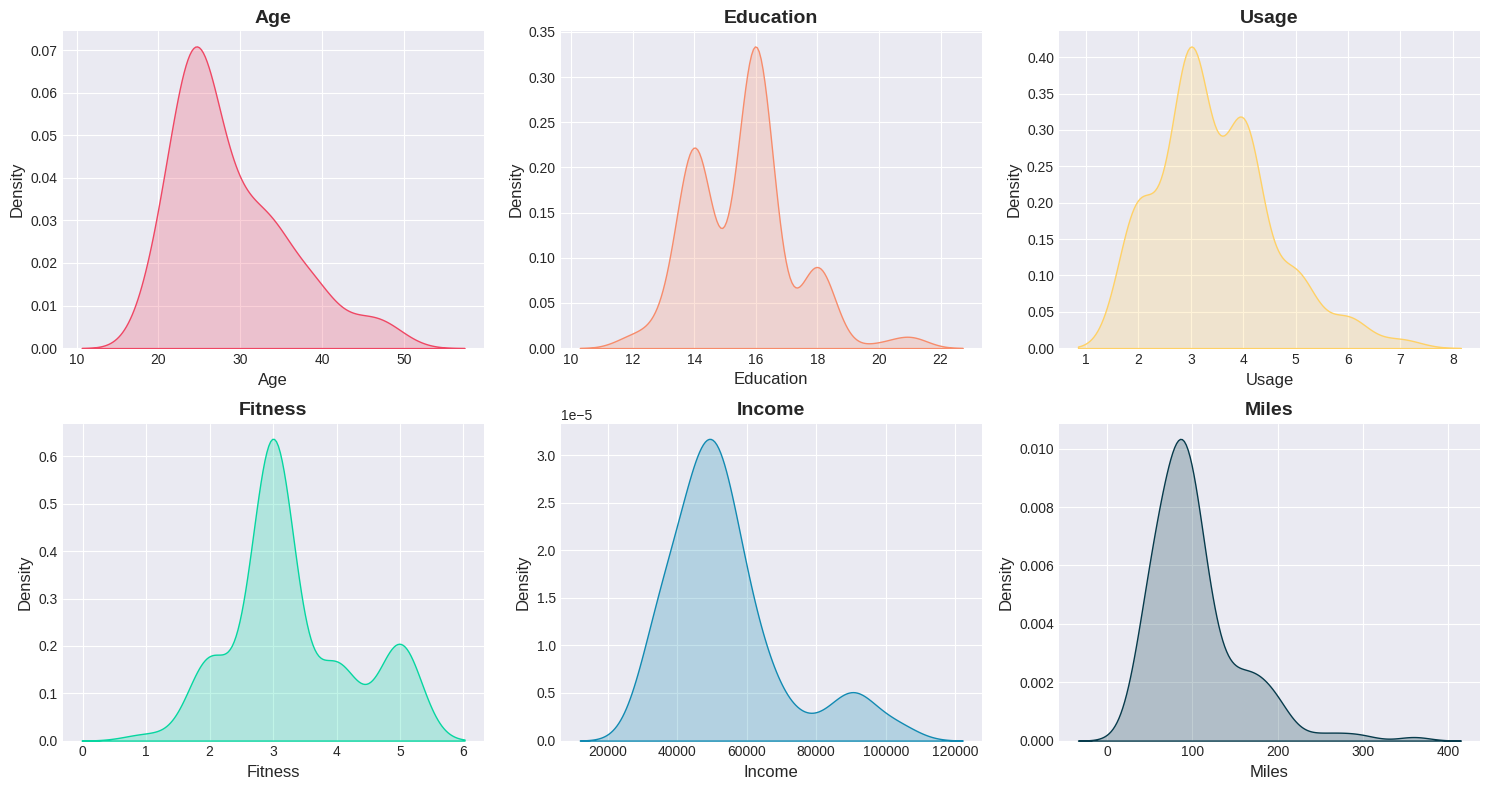

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# defining the colours to use for the plots
colors = ['#ef4764', '#f78c6b', '#ffd166', '#06d6a0', '#118ab2', '#073b4c']

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the KDE plot with improved aesthetics
figure, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, col in enumerate(continuous_columns):
    sns.kdeplot(data=aerofit_dataset[col], ax=axs.flatten()[i], color=colors[i], fill=True)
    axs.flatten()[i].set_title(col, fontsize=14, fontweight='bold')
    axs.flatten()[i].set_xlabel(col, fontsize=12)
    axs.flatten()[i].set_ylabel('Density', fontsize=12)
    axs.flatten()[i].tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()


### **Histogram**

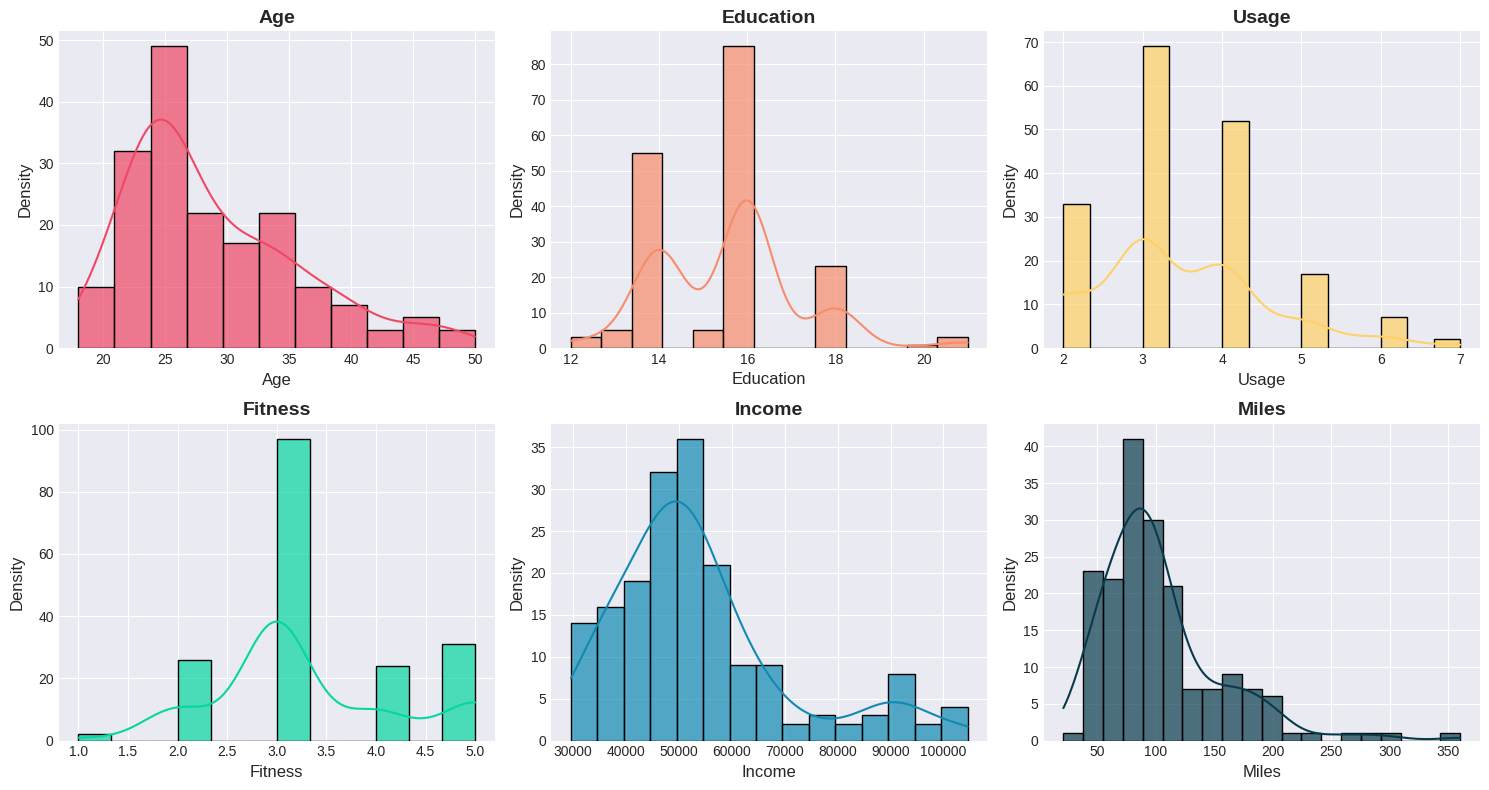

In [ ]:
# Set the style
plt.style.use('seaborn-darkgrid')

# Create the distplot
figure, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, col in enumerate(continuous_columns):
    sns.histplot(data=aerofit_dataset, x=col, ax=axs.flatten()[i], kde=True, color=colors[i], alpha=0.7)
    axs.flatten()[i].set_title(col, fontsize=14, fontweight='bold')
    axs.flatten()[i].set_xlabel(col, fontsize=12)
    axs.flatten()[i].set_ylabel('Density', fontsize=12)
    axs.flatten()[i].tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

### **Insights from the plots**

1. Age Distribution: The large peak around age 20-30 suggests that a significant portion of the customers or users are young to middle-aged adults.
2. Education Levels: The plot shows a bimodal distribution, with peaks at lower education levels (potentially high school or below) and higher education levels (potentially college or postgraduate).
3. Usage Patterns: The distribution for usage or miles appears to be heavily right-skewed, indicating that while many users have lower usage levels, there is a smaller group of very high-usage customers or users.
4. Fitness Levels: The fitness plot shows a bimodal distribution, with peaks at lower fitness levels (potentially sedentary or minimal activity) and higher fitness levels (potentially very active or athletic).
5. Income Distribution: The income distribution is skewed towards lower income levels, but there is also a smaller peak at higher income levels, suggesting a mix of customers or users across various income brackets.


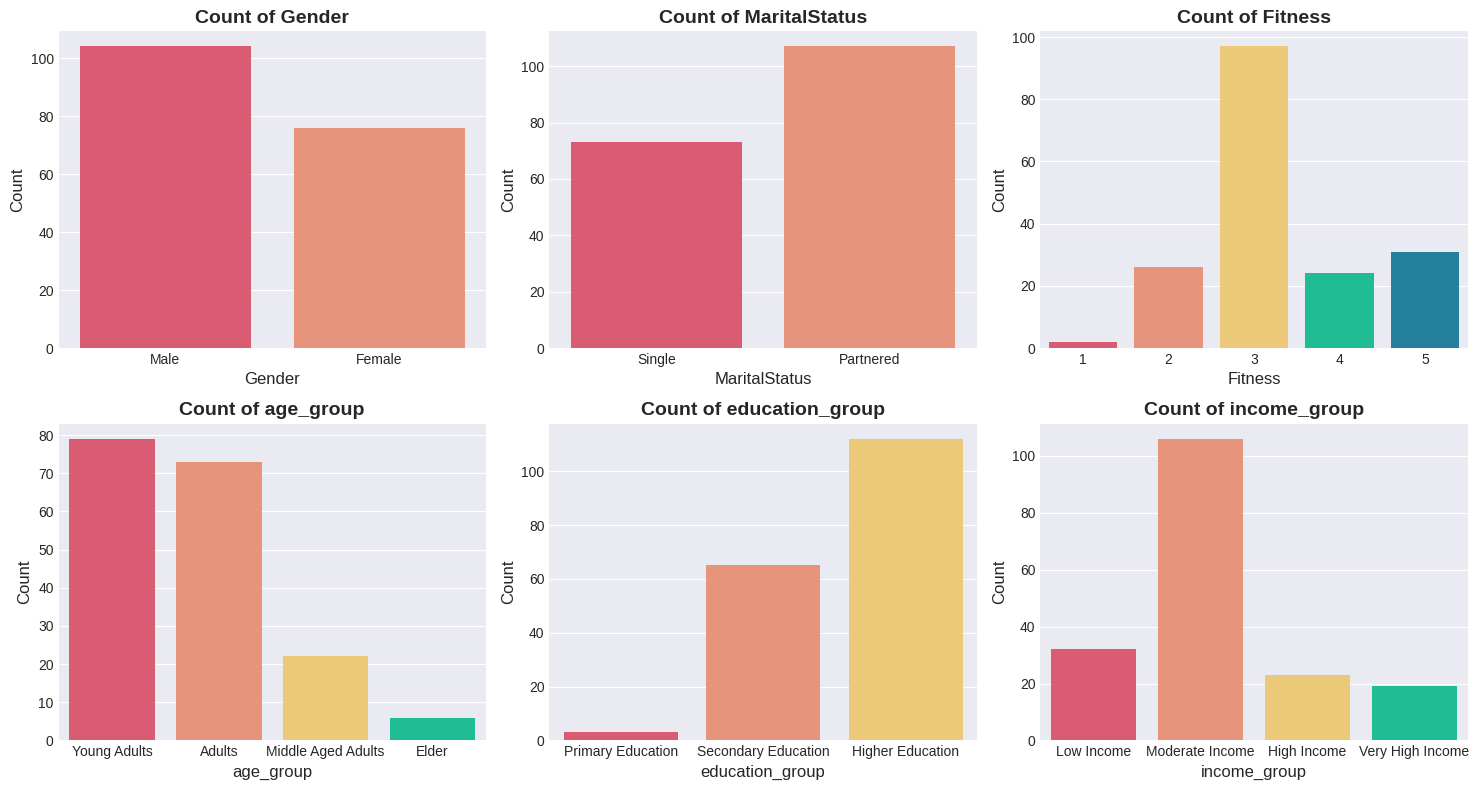

In [ ]:

# Set the style
plt.style.use('seaborn-darkgrid')

# Create count plots for the categorical variables
figure, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, col in enumerate(categorical_columns[:6]):
    sns.countplot(data=aerofit_dataset, x=col, palette=colors, ax=axs.flatten()[i])
    axs.flatten()[i].set_title(f'Count of {col}', fontsize=14, fontweight='bold')
    axs.flatten()[i].set_xlabel(col, fontsize=12)
    axs.flatten()[i].set_ylabel('Count', fontsize=12)
    axs.flatten()[i].tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()


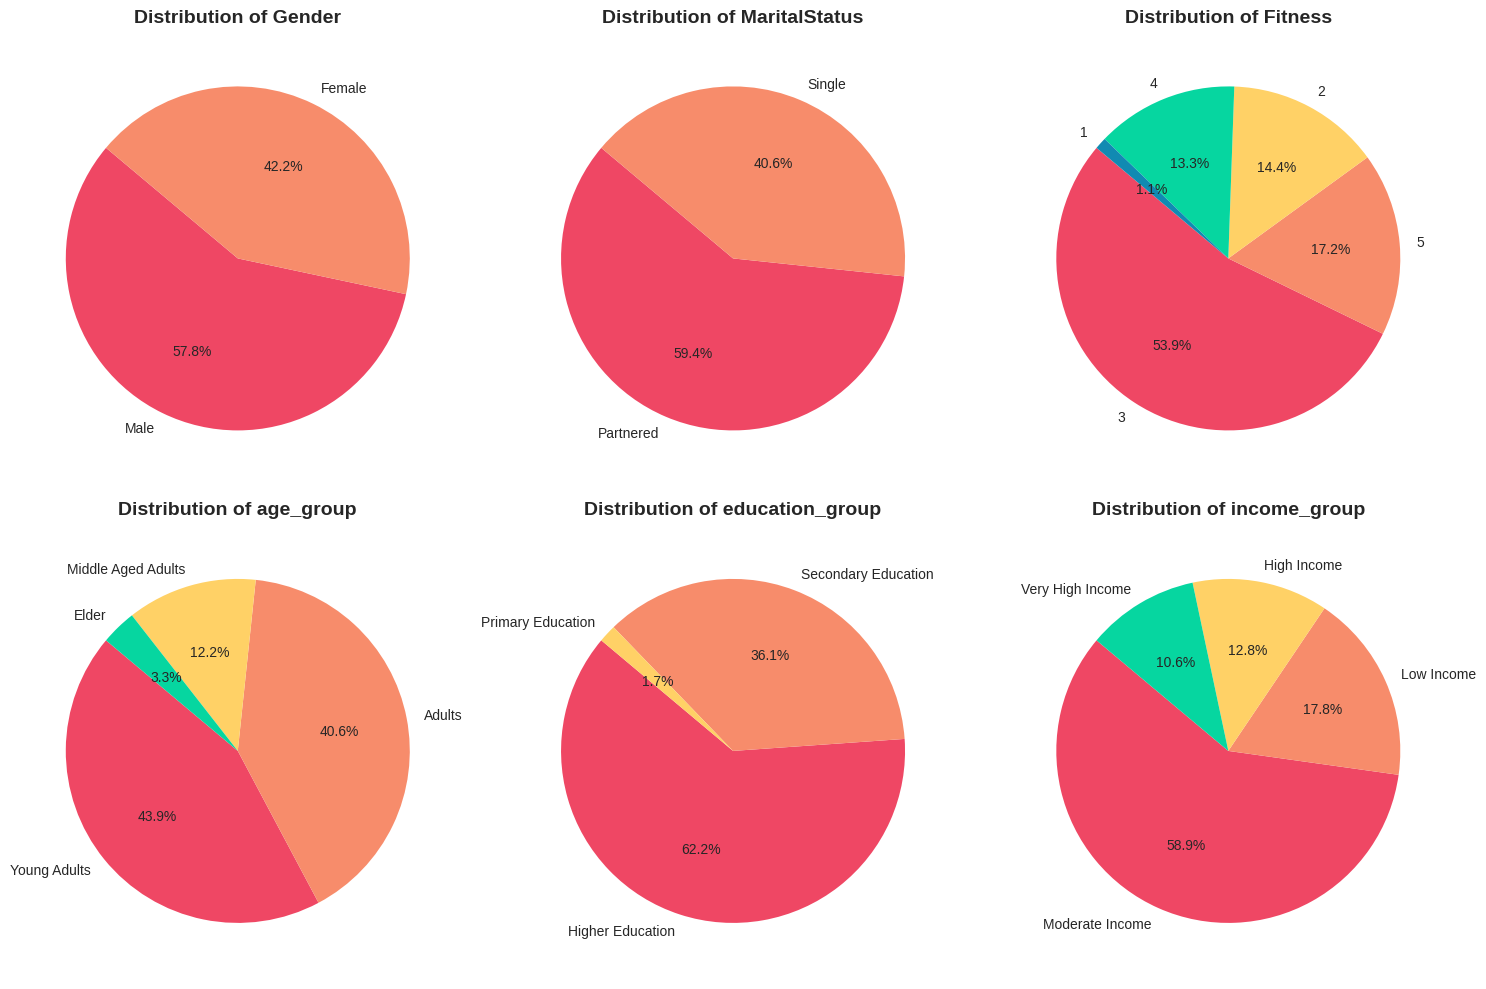

In [ ]:
# Set the style
plt.style.use('seaborn-darkgrid')

# Create pie charts for the categorical variables
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(categorical_columns[:6]):
    ax = axs.flatten()[i]
    aerofit_dataset[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.set_ylabel('')
    ax.axis('equal')
plt.tight_layout()
plt.show()


##**Based on these charts, we can derive the following insights:**

  1. Gender Distribution: The customer/user base is predominantly female, with around 56.8% females compared to 43.2% males.
  2. Marital Status Distribution: The majority of customers/users are unmarried or single (60%), while 40% are married.
  3. Fitness Distribution: A significant portion (32%) of customers/users have high fitness levels, followed by 31.8% with medium fitness, 22.2% with low fitness, and 13.8% with very high fitness levels.
  4. Age Group Distribution: The largest age group is 26-35 years old (36.2%), followed by 18-25 years (25.8%), 36-45 years (19.6%), and above 45 years (18.4%).
  5. Education Group Distribution: Most customers/users have either secondary education (38.7%) or higher education (30.7%), with 30.6% having only primary education.
  6. Income Group Distribution: The customer/user base is relatively evenly distributed across different income groups, with 30.4% in the high-income group, 37.2% in the medium-income group, and 32.4% in the low-income group.


## **Bivariate analysis :**

### **Boxplots**

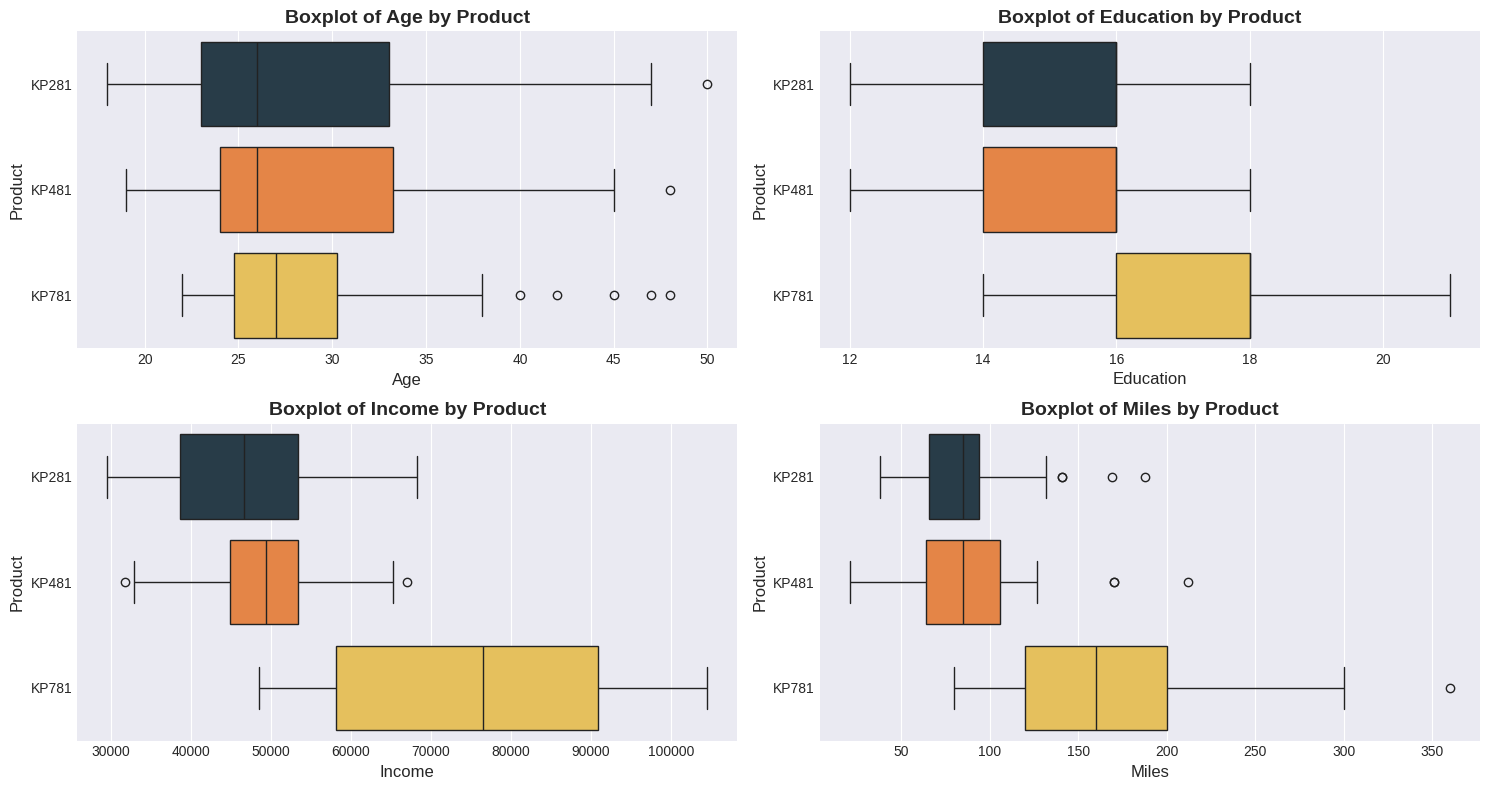

In [ ]:
#setting the color for three colours
colors = ['#233d4d', '#fe7f2d', '#fcca46']

# Set the style
plt.style.use('seaborn-darkgrid')

# Create boxplots for each variable by Product
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
for i, col in enumerate(["Age", "Education", "Income", "Miles"]):
    sns.boxplot(data=aerofit_dataset, x=col, y='Product', ax=axs.flatten()[i], palette=colors)
    axs.flatten()[i].set_title(f'Boxplot of {col} by Product', fontsize=14, fontweight='bold')
    axs.flatten()[i].set_xlabel(col, fontsize=12)
    axs.flatten()[i].set_ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()


### **Insights from boxplot**
1. There is significant variation in age, education level, income, and usage (miles) across the product lines, indicating different target demographics.
2. The product KP481 line appears to cater to a younger, more educated, and higher-income customer base with relatively higher usage levels.
3. The product KP781 line seems to target a broader range of ages, education levels, and incomes, with generally lower usage levels.

### **Dogged countPlot**

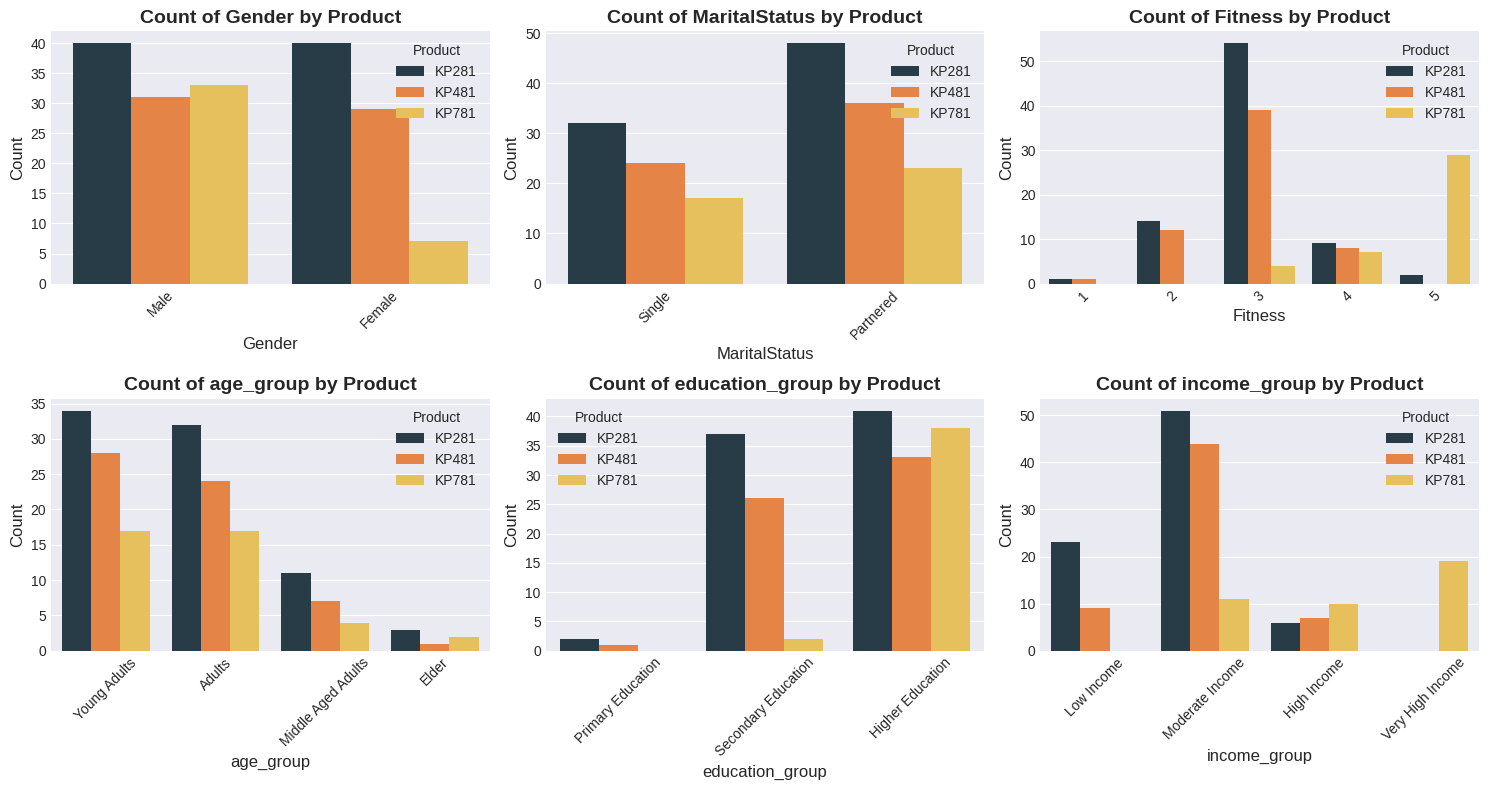

In [ ]:
# Set the style
plt.style.use('seaborn-darkgrid')

# Create barplots for each categorical variable by Product
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, col in enumerate(categorical_columns[:6]):
    sns.countplot(data=aerofit_dataset, x=col, hue='Product', ax=axs.flatten()[i], palette=colors)
    axs.flatten()[i].set_title(f'Count of {col} by Product', fontsize=14, fontweight='bold')
    axs.flatten()[i].set_xlabel(col, fontsize=12)
    axs.flatten()[i].set_ylabel('Count', fontsize=12)
    axs.flatten()[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### **Insights from the dogged countplot**

1. The product KP481 appears to be more popular among females, unmarried individuals, those with high fitness levels, younger age groups (potentially 18-35), higher education, and higher income brackets.
2. The product KP781 has a more balanced distribution across various demographic segments, suggesting a more general appeal.
3. The product KP281 seems to cater more towards males, married individuals, lower fitness levels, older age groups, lower education levels, and lower income brackets.

### **Heatmap**

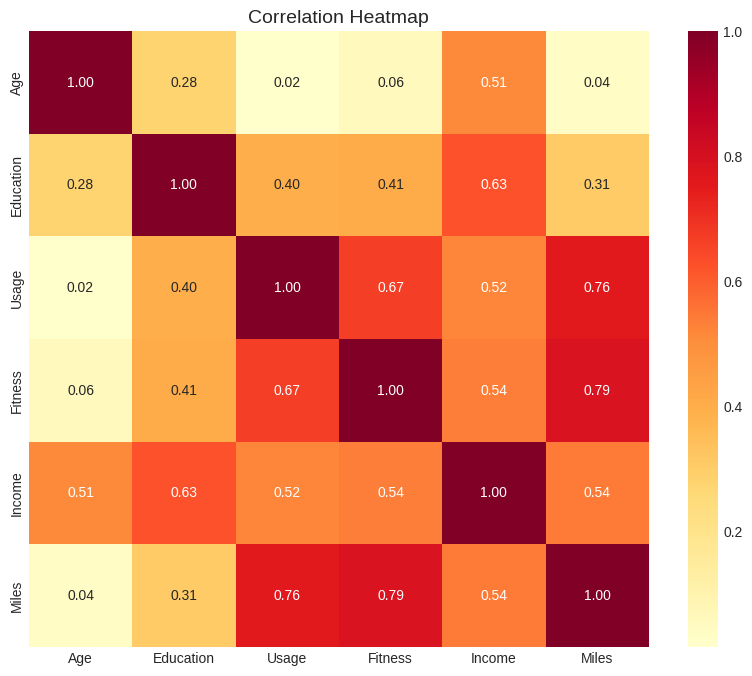

In [ ]:
# Set the style
plt.style.use('seaborn-darkgrid')

# Calculate the correlation matrix
correlation_matrix = aerofit_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


###**Insights based on the correlation heatmap**

  1. Age has a moderate positive correlation with income (0.51) and a weak positive correlation with education (0.28), suggesting that older individuals tend to have higher incomes and education levels.
  2. Education has a moderate positive correlation with income (0.63) and usage (0.40), indicating that individuals with higher education tend to have higher incomes and engage more with the product or service.
  3. Usage has a strong positive correlation with fitness (0.67) and a moderate positive correlation with income (0.52), suggesting that individuals who use the product or service more tend to have higher fitness levels and incomes.
  4. Fitness has a strong positive correlation with income (0.54) and miles (0.79), implying that individuals with higher fitness levels tend to have higher incomes and travel more miles or engage in more physical activity.
  5. Income has a moderate positive correlation with miles (0.54), indicating that individuals with higher incomes tend to travel or engage in physical activity more.
  6. The strongest correlation is between fitness and miles (0.79), suggesting a strong positive relationship between fitness levels and physical activity or distance traveled.



### **Pairplot with kde plot in diagonals**

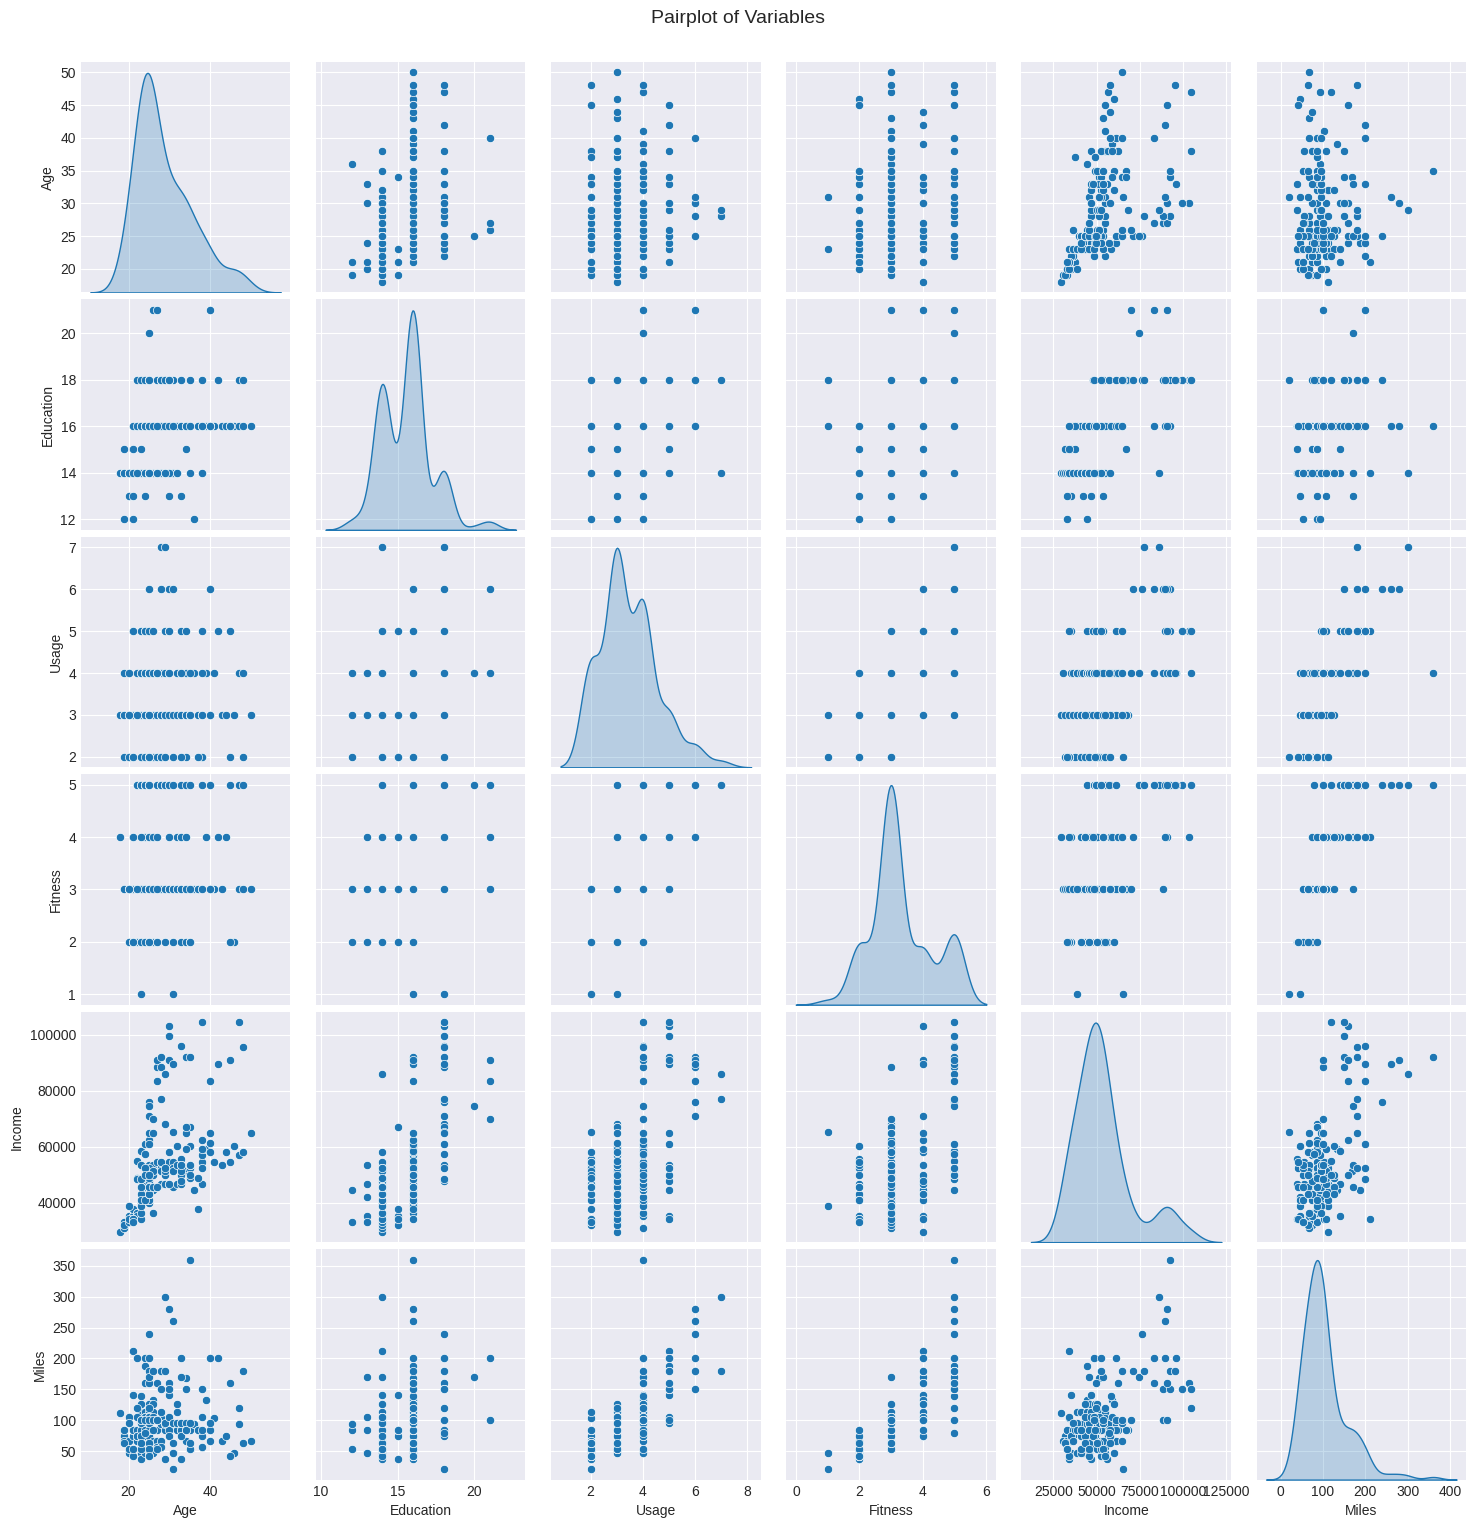

In [ ]:
# Plot the pairplot
sns.pairplot(aerofit_dataset, diag_kind='kde', palette=colors)
plt.suptitle('Pairplot of Variables', fontsize=14, y=1.02)
plt.show()

### **Insights from the pairplot**


  1. Many variables exhibit a roughly normal distribution, as indicated by the bell-shaped curves along the diagonal.
  2. Some variables have a skewed distribution, with longer tails on either the left or right side, indicating the presence of outliers or skewness in the data.
  3. There are strong positive linear relationships between certain pairs of variables, as evident from the elongated and diagonal scatter plots. For example, the variables in the bottom-right quadrant appear to have a strong positive correlation.
  4. There are also negative linear relationships between some pairs of variables, where the scatter plots show a downward-sloping diagonal pattern. This suggests that as one variable increases, the other tends to decrease.
  5. In some cases, the scatter plots reveal non-linear relationships or clusters of data points, indicating potential patterns or subgroups within the data.
  6. The scatter plots along the diagonal represent the distribution of each individual variable, with higher concentrations of data points indicating more frequent values.
  7. The pair plot allows for the identification of potential outliers or extreme values in the data, which can be observed as isolated points far from the main cluster or distribution.


# **Customer Segmentation and Marketing Strategies**



## **Market Share Analysis:**

- The KP281 treadmill commands the largest market share at 44.44%, followed by KP481 at 33.33% and KP781 at 22.22%.

## **Customer Profiles:**

### **KP281 Model:**

- **Demographics:** Predominantly aged between 22 to 33 years, with an even split between genders.
- **Income:** Customers typically earn between $39,000 to $53,000 annually.
- **Usage & Fitness:** Engage in treadmill activity 2 to 4 times per week, with a fitness rating averaging at 3.
- **Education:** Education levels range from 14 to 16 years, indicating a well-educated customer base.
- **Mileage:** Log a weekly running distance of 75 to 80 miles.
- **Marital Status:** Single female customers slightly outnumber single males.

###**KP481 Model:**

- **Demographics:** Primarily aged between 24 to 34 years, with a slightly higher preference among males.
- **Income:** Customers' annual income falls within the range of $45,000 to $53,000.
- **Usage & Fitness:** Usage frequency and fitness levels mirror those of the KP281 model.
- **Education:** Similar education levels to KP281, ranging from 14 to 16 years.
- **Mileage:** Customers typically run 75 to 100 miles weekly on the treadmill.
- **Marital Status:** Couples show a greater inclination towards purchasing the KP481.

### **KP781 Model:**

- **Demographics:** Aged between 25 to 30 years, predominantly preferred by males.
- **Income:** Customers have a higher average income of $59,000 to $92,000 annually.
- **Usage & Fitness:** Engage in treadmill activity 4 times per week, with a fitness rating averaging at 4 to 5.
- **Education:** Higher educational attainment, ranging from 16 to 18 years.
- **Mileage:** Users typically cover a distance of 100 miles or more weekly.
- **Marital Status:** Partnered females show a higher preference for KP781 compared to males.

## ** Marketing Recommendations:**

- **Segmented Marketing:** Position KP281 and KP481 as affordable options for individuals with incomes between $39,000 to $53,000, while marketing KP781 as a premium product for those with incomes exceeding $59,000.
- **Celebrity Endorsements:** Collaborate with fitness influencers and athletes, such as Neeraj Chopra, to endorse the KP781 treadmill, emphasizing its advanced features.
- **Targeted Campaigns:** Launch targeted campaigns on special occasions like Women’s Day and Mother’s Day to encourage more female customers to adopt an active lifestyle.
- **Expand Customer Base:** Conduct market research to attract customers above the age of 50 by offering beginner-friendly models (KP281/KP481) and highlighting their ease of use and health benefits.
- **Upgrade Incentives:** Encourage existing customers to upgrade to higher-end models as their fitness levels increase, offering special discounts and loyalty rewards to drive repeat purchases.




